useful:
- [rgbkrk/denotebooks: 🦕 Deno by Example, in Notebooks!](https://github.com/rgbkrk/denotebooks)
- [Jupyter Kernel for Deno | Deno Docs](https://docs.deno.com/runtime/manual/tools/jupyter)

In [ ]:
import * as pl from "npm:nodejs-polars";

In [ ]:
let df = pl.DataFrame({"A": [1,2], "B": [3,4]});

In [ ]:
console.table(df.rows())

┌───────┬───┬───┐
│ (idx) │ 0 │ 1 │
├───────┼───┼───┤
│     0 │ 1 │ 3 │
│     1 │ 2 │ 4 │
└───────┴───┴───┘


In [ ]:
import {display} from "https://deno.land/x/display@v0.1.1/mod.ts"

In [ ]:
import pl from "npm:nodejs-polars@0.8.3"; // note: version needed for tab-sep fix https://github.com/pola-rs/nodejs-polars/issues/155
let response = await fetch(
  "https://cdn.jsdelivr.net/npm/world-atlas@1/world/110m.tsv",
);
let data = await response.text();
let df = pl.readCSV(data, { sep: "\t" });
df.head()

scalerank,featurecla,labelrank,sovereignt,sov_a3,adm0_dif,level,type,admin,adm0_a3,geou_dif,geounit,gu_a3,su_dif,subunit,su_a3,brk_diff,name,name_long,brk_a3,brk_name,brk_group,abbrev,postal,formal_en,formal_fr,note_adm0,note_brk,name_sort,name_alt,mapcolor7,mapcolor8,mapcolor9,mapcolor13,pop_est,gdp_md_est,pop_year,lastcensus,gdp_year,economy,income_grp,wikipedia,fips_10,iso_a2,iso_a3,iso_n3,un_a3,wb_a2,wb_a3,woe_id,adm0_a3_is,adm0_a3_us,adm0_a3_un,adm0_a3_wb,continent,region_un,subregion,region_wb,name_len,long_len,abbrev_len,tiny,homepart
1,Admin-0 country,6,Kosovo,KOS,0,2,Sovereign country,Kosovo,KOS,0,Kosovo,KOS,0,Kosovo,KOS,1,Kosovo,Kosovo,B57,Kosovo,null,Kos.,KO,Republic of Kosovo,null,null,Self admin.; Claimed by Serbia,Kosovo,null,2,2,3,11,1804838,5352,-99,1981,-99,6. Developing region,4. Lower middle income,-99,null,-99,-99,-99,-99,KV,KSV,-99,SRB,KOS,-99,-99,Europe,Europe,Southern Europe,Europe & Central Asia,6,6,4,-99,1
1,Admin-0 country,5,Somaliland,SOL,0,2,Indeterminate,Somaliland,SOL,0,Somaliland,SOL,0,Somaliland,SOL,1,Somaliland,Somaliland,B30,Somaliland,null,Solnd.,SL,Republic of Somaliland,null,Self admin.,Self admin.; Claimed by Somalia,Somaliland,null,3,6,5,2,3500000,12250,-99,-99,-99,6. Developing region,4. Lower middle income,-99,null,-99,-99,-99,-99,-99,-99,-99,SOM,SOM,-99,-99,Africa,Africa,Eastern Africa,Sub-Saharan Africa,10,10,6,-99,1
1,Admin-0 country,6,Northern Cyprus,CYN,0,2,Sovereign country,Northern Cyprus,CYN,0,Northern Cyprus,CYN,0,Northern Cyprus,CYN,1,N. Cyprus,Northern Cyprus,B20,N. Cyprus,null,N. Cy.,CN,Turkish Republic of Northern Cyprus,null,Self admin.,Self admin.; Claimed by Cyprus,"Cyprus, Northern",null,3,1,4,8,265100,3600,-99,-99,-99,6. Developing region,3. Upper middle income,-99,null,-99,-99,-99,-99,-99,-99,-99,CYP,CYP,-99,-99,Asia,Asia,Western Asia,Europe & Central Asia,9,15,6,-99,1
1,Admin-0 country,3,Afghanistan,AFG,0,2,Sovereign country,Afghanistan,AFG,0,Afghanistan,AFG,0,Afghanistan,AFG,0,Afghanistan,Afghanistan,AFG,Afghanistan,null,Afg.,AF,Islamic State of Afghanistan,null,null,null,Afghanistan,null,5,6,8,7,28400000,22270,-99,1979,-99,7. Least developed region,5. Low income,-99,null,AF,AFG,4,4,AF,AFG,-99,AFG,AFG,-99,-99,Asia,Asia,Southern Asia,South Asia,11,11,4,-99,1
1,Admin-0 country,3,Angola,AGO,0,2,Sovereign country,Angola,AGO,0,Angola,AGO,0,Angola,AGO,0,Angola,Angola,AGO,Angola,null,Ang.,AO,People's Republic of Angola,null,null,null,Angola,null,3,2,6,1,12799293,110300,-99,1970,-99,7. Least developed region,3. Upper middle income,-99,null,AO,AGO,24,24,AO,AGO,-99,AGO,AGO,-99,-99,Africa,Africa,Middle Africa,Sub-Saharan Africa,6,6,4,-99,1


In [ ]:
df = df
    .groupBy("continent")
    .agg(pl.col("pop_est").sum().alias("total_pop_est"))

df = df.sort("continent")

display(df)

continent,total_pop_est
Africa,993281878
Antarctica,3802
Asia,4085852698
Europe,728131201
North America,539350981
Oceania,33519610
Seven seas (open ocean),140
South America,394355478


In [ ]:
import * as d3 from "npm:d3"

const canvasHeight = 400;
const max = d3.max(df.total_pop_est)
const xScaleSorted = d3.scaleLinear().domain([0,max]).range([0,300])
const yScaleSorted = d3.scaleBand().domain(df.continent).range([0, canvasHeight]).padding(0.1);

In [ ]:
// import {createCanvas, Image, Path2D} from "https://deno.land/x/skia_canvas/mod.ts"

In [ ]:
// const canvas = createCanvas(400, 300);
// const ctx = canvas.getContext("2d");

// df.toRecords().forEach((record, i) => {
//     const y = yScaleSorted(record.continent)
//     const width = xScaleSorted(record.total_pop_est)
//     const height = yScaleSorted.bandwidth()

//     ctx.fillStyle = width < xScaleSorted(max) ? "#8787A7" : "575787"
//     ctx.fillRect(0,y,width,height)
//     ctx.fillStyle = "#000"
//     ctx.fillText(record.continent, width+5, y + height/2)
// })

above, skia-canvas didn't seem to want to install.

Trying a different approach from here: [d3-tslab-example.ipynb](https://gist.github.com/smoofra/4e7d826c68dd95541a5e1ba54bf05383)

In [ ]:
import { JSDOM } from "npm:jsdom";
import * as d3 from "npm:d3";

In [ ]:
const dom = new JSDOM(`<!DOCTYPE html><body></body>`);
let body = d3.select(dom.window.document.querySelector("body"))
let svg = body.append('svg').attr('width', 200).attr('height', 200).attr('xmlns', 'http://www.w3.org/2000/svg');
svg.append("circle")
    .attr("cx", 100)
    .attr("cy", 100)
    .attr("r", 90)
    .style("fill", "black")
body.html()

'<svg width="200" height="200" xmlns="http://www.w3.org/2000/svg"><circle cx="100" cy="100" r="90" st'... 34 more characters

In [ ]:
await Deno.jupyter.display(body.html())

'<svg width="200" height="200" xmlns="http://www.w3.org/2000/svg"><circle cx="100" cy="100" r="90" st'... 34 more characters

In [ ]:
console.log(body.html())

<svg width="200" height="200" xmlns="http://www.w3.org/2000/svg"><circle cx="100" cy="100" r="90" style="fill: black;"></circle></svg>


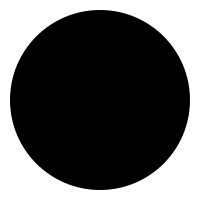

In [ ]:
// https://deno.land/api@v1.38.1?unstable=&s=Deno.jupyter.svg
Deno.jupyter.svg`${body.html()}`

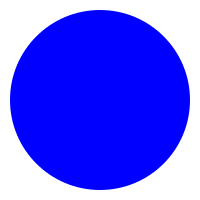

In [ ]:
function showsvg(block) {
   const dom = new JSDOM(`<!DOCTYPE html><body></body>`);
   let body = d3.select(dom.window.document.querySelector("body"))
   let svg = body.append('svg').attr('width', 200).attr('height', 200).attr('xmlns', 'http://www.w3.org/2000/svg');
   block(svg)
   return Deno.jupyter.svg`${body.html()}`;
}
showsvg(svg => { 
    svg.append("circle")
    .attr("cx", 100)
    .attr("cy", 100)
    .attr("r", 90)
    .style("fill", "blue")
});

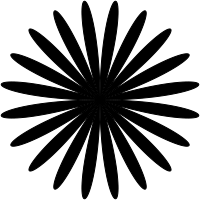

In [ ]:
const N = 1000;
const bound = Math.PI * 2;
const theta = [...Array(N).keys()].map(x => x * bound/N)

const x = d3.scaleLinear().domain([-1,1]).range([0,200])
const y = x

const line = d3.line<number>()
    .x(th =>  x(Math.sin(10 * th) * Math.cos(th)))
    .y(th =>  y(Math.sin(10 * th) * Math.sin(th)))

showsvg(svg => { 
    svg.append("path")
       .attr("d", line(theta))
       .style("fill", "black")
       .style("stroke", "black")
})

In [ ]:
- related to my issue: https://github.com/denoland/deno/issues/22508

https://github.com/samizdatco/skia-canvas

In [ ]:
// import { createCanvas } from "https://deno.land/x/skia_canvas@0.5.4/mod.ts";


TypeError: Deno.dlopen is not a function

alt: [canvas@v1.4.1 | Deno](https://deno.land/x/canvas@v1.4.1)

In [ ]:
import { createCanvas } from "https://deno.land/x/canvas/mod.ts";
